In [46]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [47]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates as mdates

In [49]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

In [66]:
def plot_bar_profit(df: pd.DataFrame):
    df.index = pd.to_datetime(df["注文日時"])
    df.index.name = "DateTime"
    ser = df["損益"].dropna()
    total = int(ser.sum())
    fig, ax = plt.subplots(figsize=(6, 4))

    ax.bar(ser.index, ser, width=0.0005, label=f"総収益 : {total:d} 円")
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax.set_ylabel("確定損益（円/株）")
    ax.grid(axis="y")
    ax.legend(fontsize=7)

    plt.tight_layout()
    plt.show()

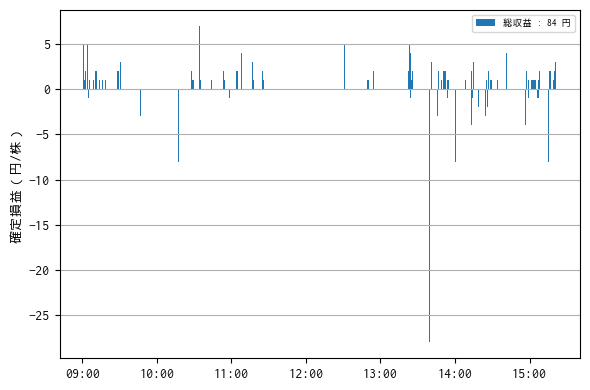

In [67]:
file_pkl = "../transaction.pkl"
df_transaction = pd.read_pickle(file_pkl)
plot_bar_profit(df_transaction)